### Домашнее задание «Деревья решений»

Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.
По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

In [64]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(load_boston()['filename'], skiprows=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Пропусков в даных нет, построим модель на исходных данных, не меняя их. 

Попробуем построить модель, не задавая гиперпараметры, ограничим только максимальную глубину дерева.

In [4]:
reg = DecisionTreeRegressor(max_depth=4)

In [5]:
X, Y = df.iloc[:, :-1], df['MEDV']


In [6]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.3, random_state=146)

In [7]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [8]:
y_pred = reg.predict(x_test)

In [9]:
mean_squared_error(y_pred, y_test)

19.342422848843505

In [10]:
reg.score(x_test, y_test)

0.7132583665692513

Обучим модель на том же разделении данных. С помощью GridSearchCV будем варьировать гиперпараметры, чтобы выбрать наилучшие.

In [11]:
from sklearn.model_selection import GridSearchCV


In [55]:
parameters = {'splitter':('best','random'), 
              'max_depth':np.arange(1,8), 
              'min_samples_split':np.arange(2,10), 
              'min_samples_leaf':np.arange(1,5)}


In [57]:
tree_grid = GridSearchCV(DecisionTreeRegressor(), parameters, cv = 7, n_jobs=-1)
tree_grid.fit(x_train, y_train)


C:\Users\Polina.DESKTOP-UGBOPLJ\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'splitter': ('best', 'random'), 'max_depth': array([1, 2, 3, 4, 5, 6, 7]), 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
tree_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [59]:
best_tree = DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=2, splitter='random')

In [60]:
best_tree.fit(x_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='random')

In [61]:
y_pred_best = best_tree.predict(x_test)
best_tree.score(x_test, y_test)

0.7584267706793714

In [62]:
mean_squared_error(y_test, y_pred_best)

16.295546253867343

С новыми гиперпараметрами mse заметно уменьшилась, а точность предсказания поднялась примерно на 4%

Наиболее важными фичами для модели оказались следующие: LSTAT (доля людей более низкого класса), RM (количество комнат) и NOX (концентрация оксидов азота)

([<matplotlib.axis.YTick at 0x2443bc87788>,
 [Text(0, 0, 'CRIM'),
  Text(0, 1, 'ZN'),
  Text(0, 2, 'INDUS'),
  Text(0, 3, 'CHAS'),
  Text(0, 4, 'NOX'),
  Text(0, 5, 'RM'),
  Text(0, 6, 'AGE'),
  Text(0, 7, 'DIS'),
  Text(0, 8, 'RAD'),
  Text(0, 9, 'TAX'),
  Text(0, 10, 'PTRATIO'),
  Text(0, 11, 'B'),
  Text(0, 12, 'LSTAT')])

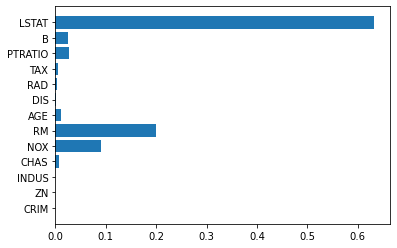

In [65]:
plt.barh(np.arange(len(best_tree.feature_importances_)), best_tree.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)

In [66]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(tree, feature_names=None, class_names=None):
    print(export_graphviz(tree, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [67]:
get_tree_dot_view(tree_grid.best_estimator_, X.columns)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="LSTAT <= 8.73\nmse = 91.487\nsamples = 354\nvalue = 22.788", fillcolor="#e581395a"] ;
1 [label="RM <= 7.559\nmse = 86.23\nsamples = 129\nvalue = 31.128", fillcolor="#e581398d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="RM <= 6.525\nmse = 47.22\nsamples = 108\nvalue = 28.355", fillcolor="#e581397c"] ;
1 -> 2 ;
3 [label="INDUS <= 12.054\nmse = 22.99\nsamples = 46\nvalue = 23.722", fillcolor="#e5813960"] ;
2 -> 3 ;
4 [label="RM <= 6.257\nmse = 8.311\nsamples = 39\nvalue = 22.869", fillcolor="#e581395a"] ;
3 -> 4 ;
5 [label="RAD <= 2.307\nmse = 8.834\nsamples = 19\nvalue = 21.453", fillcolor="#e5813952"] ;
4 -> 5 ;
6 [label="mse = 21.142\nsamples = 4\nvalue = 19.325", fillcolor="#e5813945"] ;
5 -> 6 ;
7 [label="mse = 4.023\nsamples = 15\nvalue = 22.02", fillcolor="#e5813955"] ;
5 -> 7 ;
8 [label="RM <= 6.396\nmse = 4.096\nsamples = 20\nvalue = 24.215", fillcolor="#e5813963"] ;
4 -> 8 

Для полученного после настройки гиперпараметров дерева визуализация получается слишком громоздкой, чтобы помещать её сюда. Можно визуализировать первое дерево с небольшой максимальной глубиной.

In [130]:
get_tree_dot_view(reg, X.columns)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="RM <= 6.941\nmse = 91.487\nsamples = 354\nvalue = 22.788", fillcolor="#e581394f"] ;
1 [label="LSTAT <= 14.405\nmse = 41.829\nsamples = 296\nvalue = 19.837", fillcolor="#e581393c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="DIS <= 1.434\nmse = 26.74\nsamples = 173\nvalue = 23.436", fillcolor="#e5813953"] ;
1 -> 2 ;
3 [label="LSTAT <= 10.505\nmse = 91.577\nsamples = 4\nvalue = 44.475", fillcolor="#e58139db"] ;
2 -> 3 ;
4 [label="mse = 0.0\nsamples = 3\nvalue = 50.0", fillcolor="#e58139ff"] ;
3 -> 4 ;
5 [label="mse = -0.0\nsamples = 1\nvalue = 27.9", fillcolor="#e5813970"] ;
3 -> 5 ;
6 [label="RM <= 6.544\nmse = 14.481\nsamples = 169\nvalue = 22.938", fillcolor="#e5813950"] ;
2 -> 6 ;
7 [label="mse = 7.884\nsamples = 132\nvalue = 21.656", fillcolor="#e5813947"] ;
6 -> 7 ;
8 [label="mse = 11.219\nsamples = 37\nvalue = 27.514", fillcolor="#e581396d"] ;
6 -> 8 ;
9 [label="NOX <= 0.603\nm

![tree](tree1.jpg)